In [2]:
import numpy as np 
import numba
import timeit 
import matplotlib.pyplot as plt

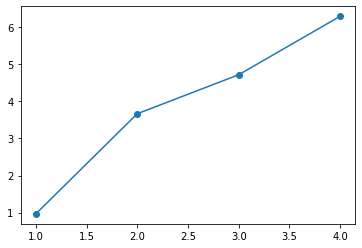

In [9]:
x = np.array([1,2,3,4])
y = 2*x + np.random.randn(x.shape[0])
plt.scatter(x,y);
plt.plot(x,y);

In [11]:
r = np.corrcoef(x,y)[0,1]
print(r)

0.9815188895642739


In [12]:
n = 10 #n_samples
X = np.random.randn(n,4)
Y = X + np.random.randn(n,4)

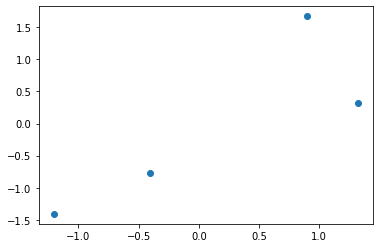

In [16]:
plt.scatter(X[0],Y[0]);
#plt.plot(X[0],Y[0]);

In [17]:
r = np.zeros(n)

for i in np.arange(n) :
    r[i] = np.corrcoef(X[i],Y[i])[0,1]

print(r)

[ 0.83901363  0.86863228 -0.32836783  0.97816023  0.92389952  0.965257
 -0.02311507  0.80591044  0.65981279  0.4537276 ]


In [38]:
def corrcoef_n_samples(X,Y) :
    #X e Y devono essere array di tipo (n,4): ogni riga è uno degli n samples di cui vogliamo valutare il coefficiente di correlazione lineare e le colonne sono 4 perché nel nostro caso ogni sample è
    #costituito da 4 elementi (inutile fare una cosa più generale)
    if X.shape != Y.shape :
        print("X.shape and Y.shape don't match")
        return None
    r = np.zeros(X.shape[0])
    for i in range(X.shape[0]) : #potrei mettere range(16) qui ma se ho dei casi con solo 3 layers attivi le combinazioni saranno meno di 16. Se questi casi in realtà non ci sono si può mettere 16 e basta
        r[i] = np.corrcoef(X[i],Y[i])[0,1]
    return r

In [29]:
R = corrcoef_n_samples(X,Y)
print(R)
print(np.abs(R).argmax())

[ 0.83901363  0.86863228 -0.32836783  0.97816023  0.92389952  0.965257
 -0.02311507  0.80591044  0.65981279  0.4537276 ]
3


In [43]:
def find_best_alignment(X,Y) :
    if X.shape != Y.shape :
        print("X.shape and Y.shape don't match")
        return None 
    r = np.zeros(X.shape[0])
    for i in range(X.shape[0]) :
        r[i] = np.corrcoef(X[i],Y[i])[0,1]
    return X[np.abs(r).argmax()]

In [33]:
b = find_best_alignment(X,Y)
print(b)

[-2.62057169 -0.74982884  0.12471298  1.43601209]


In [39]:
#immaginiamo di dover effettuare l'operazione di cui sopra (trovare la quaterna migliore su 16 candidati) un certo numero di volte (uno per evento da valutare, sarebbe). Valutiamo le prestazioni di questa situazione
def benchmark_find_best_alignment(n_events=100) :
    X = np.random.randn(n_events,16,4) #così ho un array di n_events arrays, ciascuno dei quali è 16x4
    Y = 2*X + 0.1*np.random.randn(n_events,16,4) #dati correlati circa linearmente. Dovrei fare un sorting per poterli rappresentare ma non mi interessa, mi basta avere le varie coppie (x,y)

    for i in range(n_events) :
        find_best_alignment(X[i],Y[i]) #sto passando l'evento i, composto da 16 array di 4 elementi ciascuno
        #non mi serve fare un return visto che qua sto solo simulando df.groupby(..).apply(find_best_alignment)

In [41]:
%timeit benchmark_find_best_alignment()

10 loops, best of 3: 134 ms per loop


In [47]:
@numba.jit(nopython=True,parallel=True)
def find_best_alignment_numba(X,Y) : #è uguale a quella di prima ma ho cambiato il nome per tenere distinti i benchmark
    if X.shape != Y.shape :
        print("X.shape and Y.shape don't match")
        return None 
    r = np.zeros(X.shape[0])
    for i in range(X.shape[0]) :
        r[i] = np.corrcoef(X[i],Y[i])[0,1]
    return X[np.abs(r).argmax()]

In [48]:
#immaginiamo di dover effettuare l'operazione di cui sopra (trovare la quaterna migliore su 16 candidati) un certo numero di volte (uno per evento da valutare, sarebbe). Valutiamo le prestazioni di questa situazione
def benchmark_find_best_alignment_numba(n_events=100) :
    X = np.random.randn(n_events,16,4) #così ho un array di n_events arrays, ciascuno dei quali è 16x4
    Y = 2*X + 0.1*np.random.randn(n_events,16,4) #dati correlati circa linearmente. Dovrei fare un sorting per poterli rappresentare ma non mi interessa, mi basta avere le varie coppie (x,y)

    for i in range(n_events) :
        find_best_alignment_numba(X[i],Y[i]) #sto passando l'evento i, composto da 16 array di 4 elementi ciascuno
        #non mi serve fare un return visto che qua sto solo simulando df.groupby(..).apply(find_best_alignment)

In [50]:
!pip install --upgrade tbb

     |████████████████████████████████| 3.6MB 5.5MB/s 


In [51]:
%timeit benchmark_find_best_alignment_numba()

100 loops, best of 3: 5.48 ms per loop


In [52]:
N = 1000
%timeit benchmark_find_best_alignment(n_events=N)
%timeit benchmark_find_best_alignment_numba(n_events=N)

1 loop, best of 3: 1.36 s per loop
10 loops, best of 3: 55 ms per loop


In [53]:
N = 100000
%timeit benchmark_find_best_alignment(n_events=N)
%timeit benchmark_find_best_alignment_numba(n_events=N)

1 loop, best of 3: 2min 16s per loop
1 loop, best of 3: 5.39 s per loop


In [36]:
c = np.zeros((2,16,4))
print(c)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
